## predicting heart-disease using machine learning

In [2]:
import pandas as pd

heart_disease=pd.read_csv("heart-disease.csv")

heart_disease_df=pd.DataFrame(heart_disease)
heart_disease_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
import sklearn

sklearn.__version__

'1.1.3'

In [93]:
#preparing the tools

#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#importing models from SCIKIT-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.ensemble import RandomForestClassifier

#evaluating a model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [5]:

heart_disease=pd.read_csv("heart-disease.csv")
heart_disease_df=pd.DataFrame(heart_disease)

heart_disease_df.head(20)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


<AxesSubplot: >

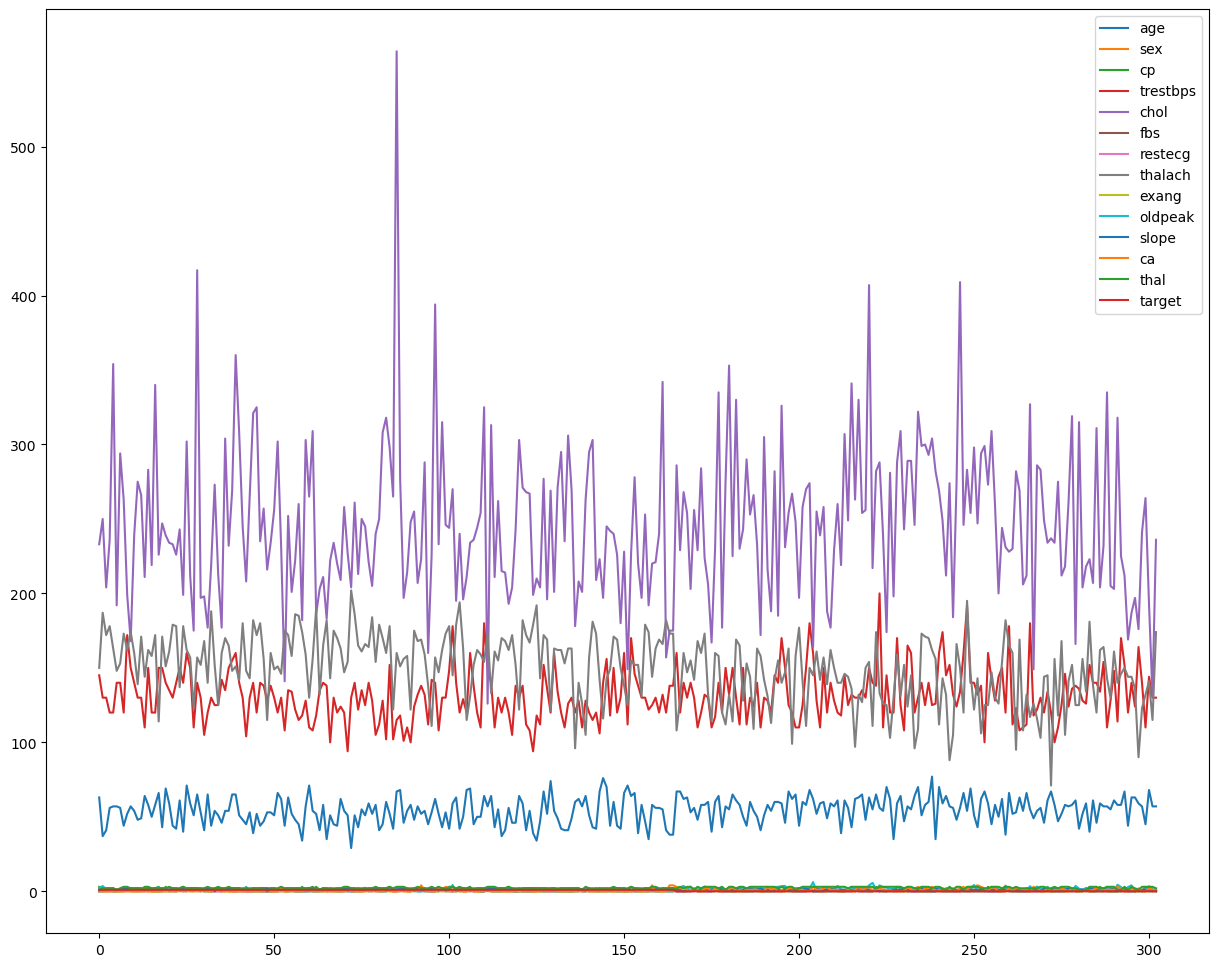

In [6]:
heart_disease_df.plot(figsize=(15,12))

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'cp'}>,
        <AxesSubplot: title={'center': 'trestbps'}>],
       [<AxesSubplot: title={'center': 'chol'}>,
        <AxesSubplot: title={'center': 'fbs'}>,
        <AxesSubplot: title={'center': 'restecg'}>,
        <AxesSubplot: title={'center': 'thalach'}>],
       [<AxesSubplot: title={'center': 'exang'}>,
        <AxesSubplot: title={'center': 'oldpeak'}>,
        <AxesSubplot: title={'center': 'slope'}>,
        <AxesSubplot: title={'center': 'ca'}>],
       [<AxesSubplot: title={'center': 'thal'}>,
        <AxesSubplot: title={'center': 'target'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

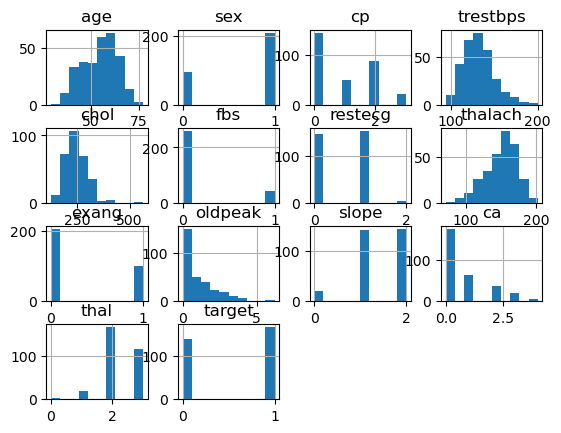

In [7]:
heart_disease_df.hist()

In [8]:
heart_disease_df




,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<AxesSubplot: >

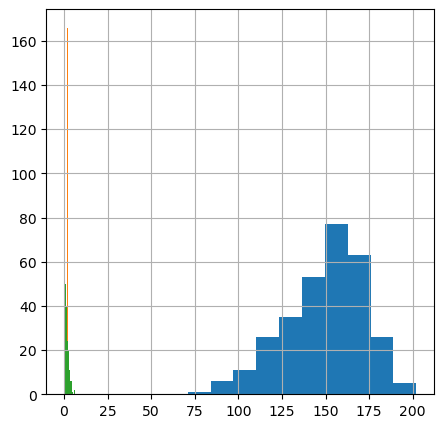

In [9]:
heart_disease_df["thalach"].hist()
heart_disease_df["thal"].hist()
heart_disease_df["oldpeak"].hist(figsize=(5,5))






In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score

np.random.seed(42)

x=heart_disease_df.drop("target",axis=1)
y=heart_disease_df["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

model=RandomForestClassifier()

model.fit(x_train,y_train)


y_preds=model.predict(x_test)

print(f"the precision is {precision_score(y_test,y_preds)*100:.2f}%")
print(f"the recall score is {recall_score(y_test,y_preds)}")
print(f"the f1 score is {f1_score(y_test,y_preds)}")


the precision is 88.89%
the recall score is 0.8571428571428571
the f1 score is 0.8727272727272727


In [11]:
heart_disease=pd.read_csv("heart-disease.csv")
df=pd.DataFrame(heart_disease)

heart_disease_df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


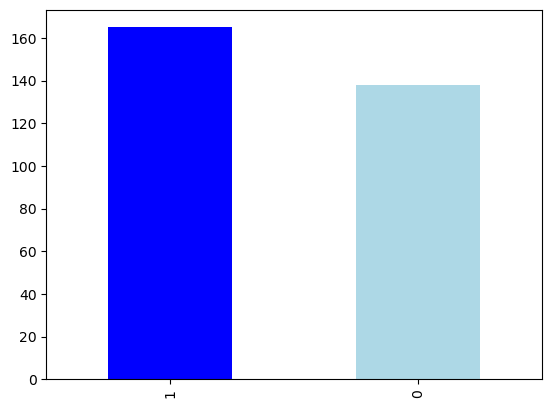

In [12]:
df["target"].value_counts().plot(kind="bar",color=["blue","lightblue"]);

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [17]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


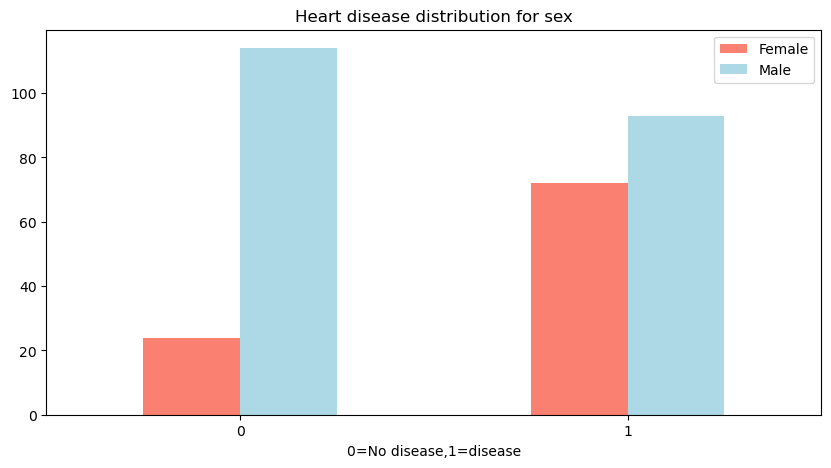

In [18]:
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                   figsize=(10,5),
                                   color=["salmon","lightblue"])
plt.title("Heart disease distribution for sex")
plt.xlabel("0=No disease,1=disease")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);


<AxesSubplot: xlabel='target'>

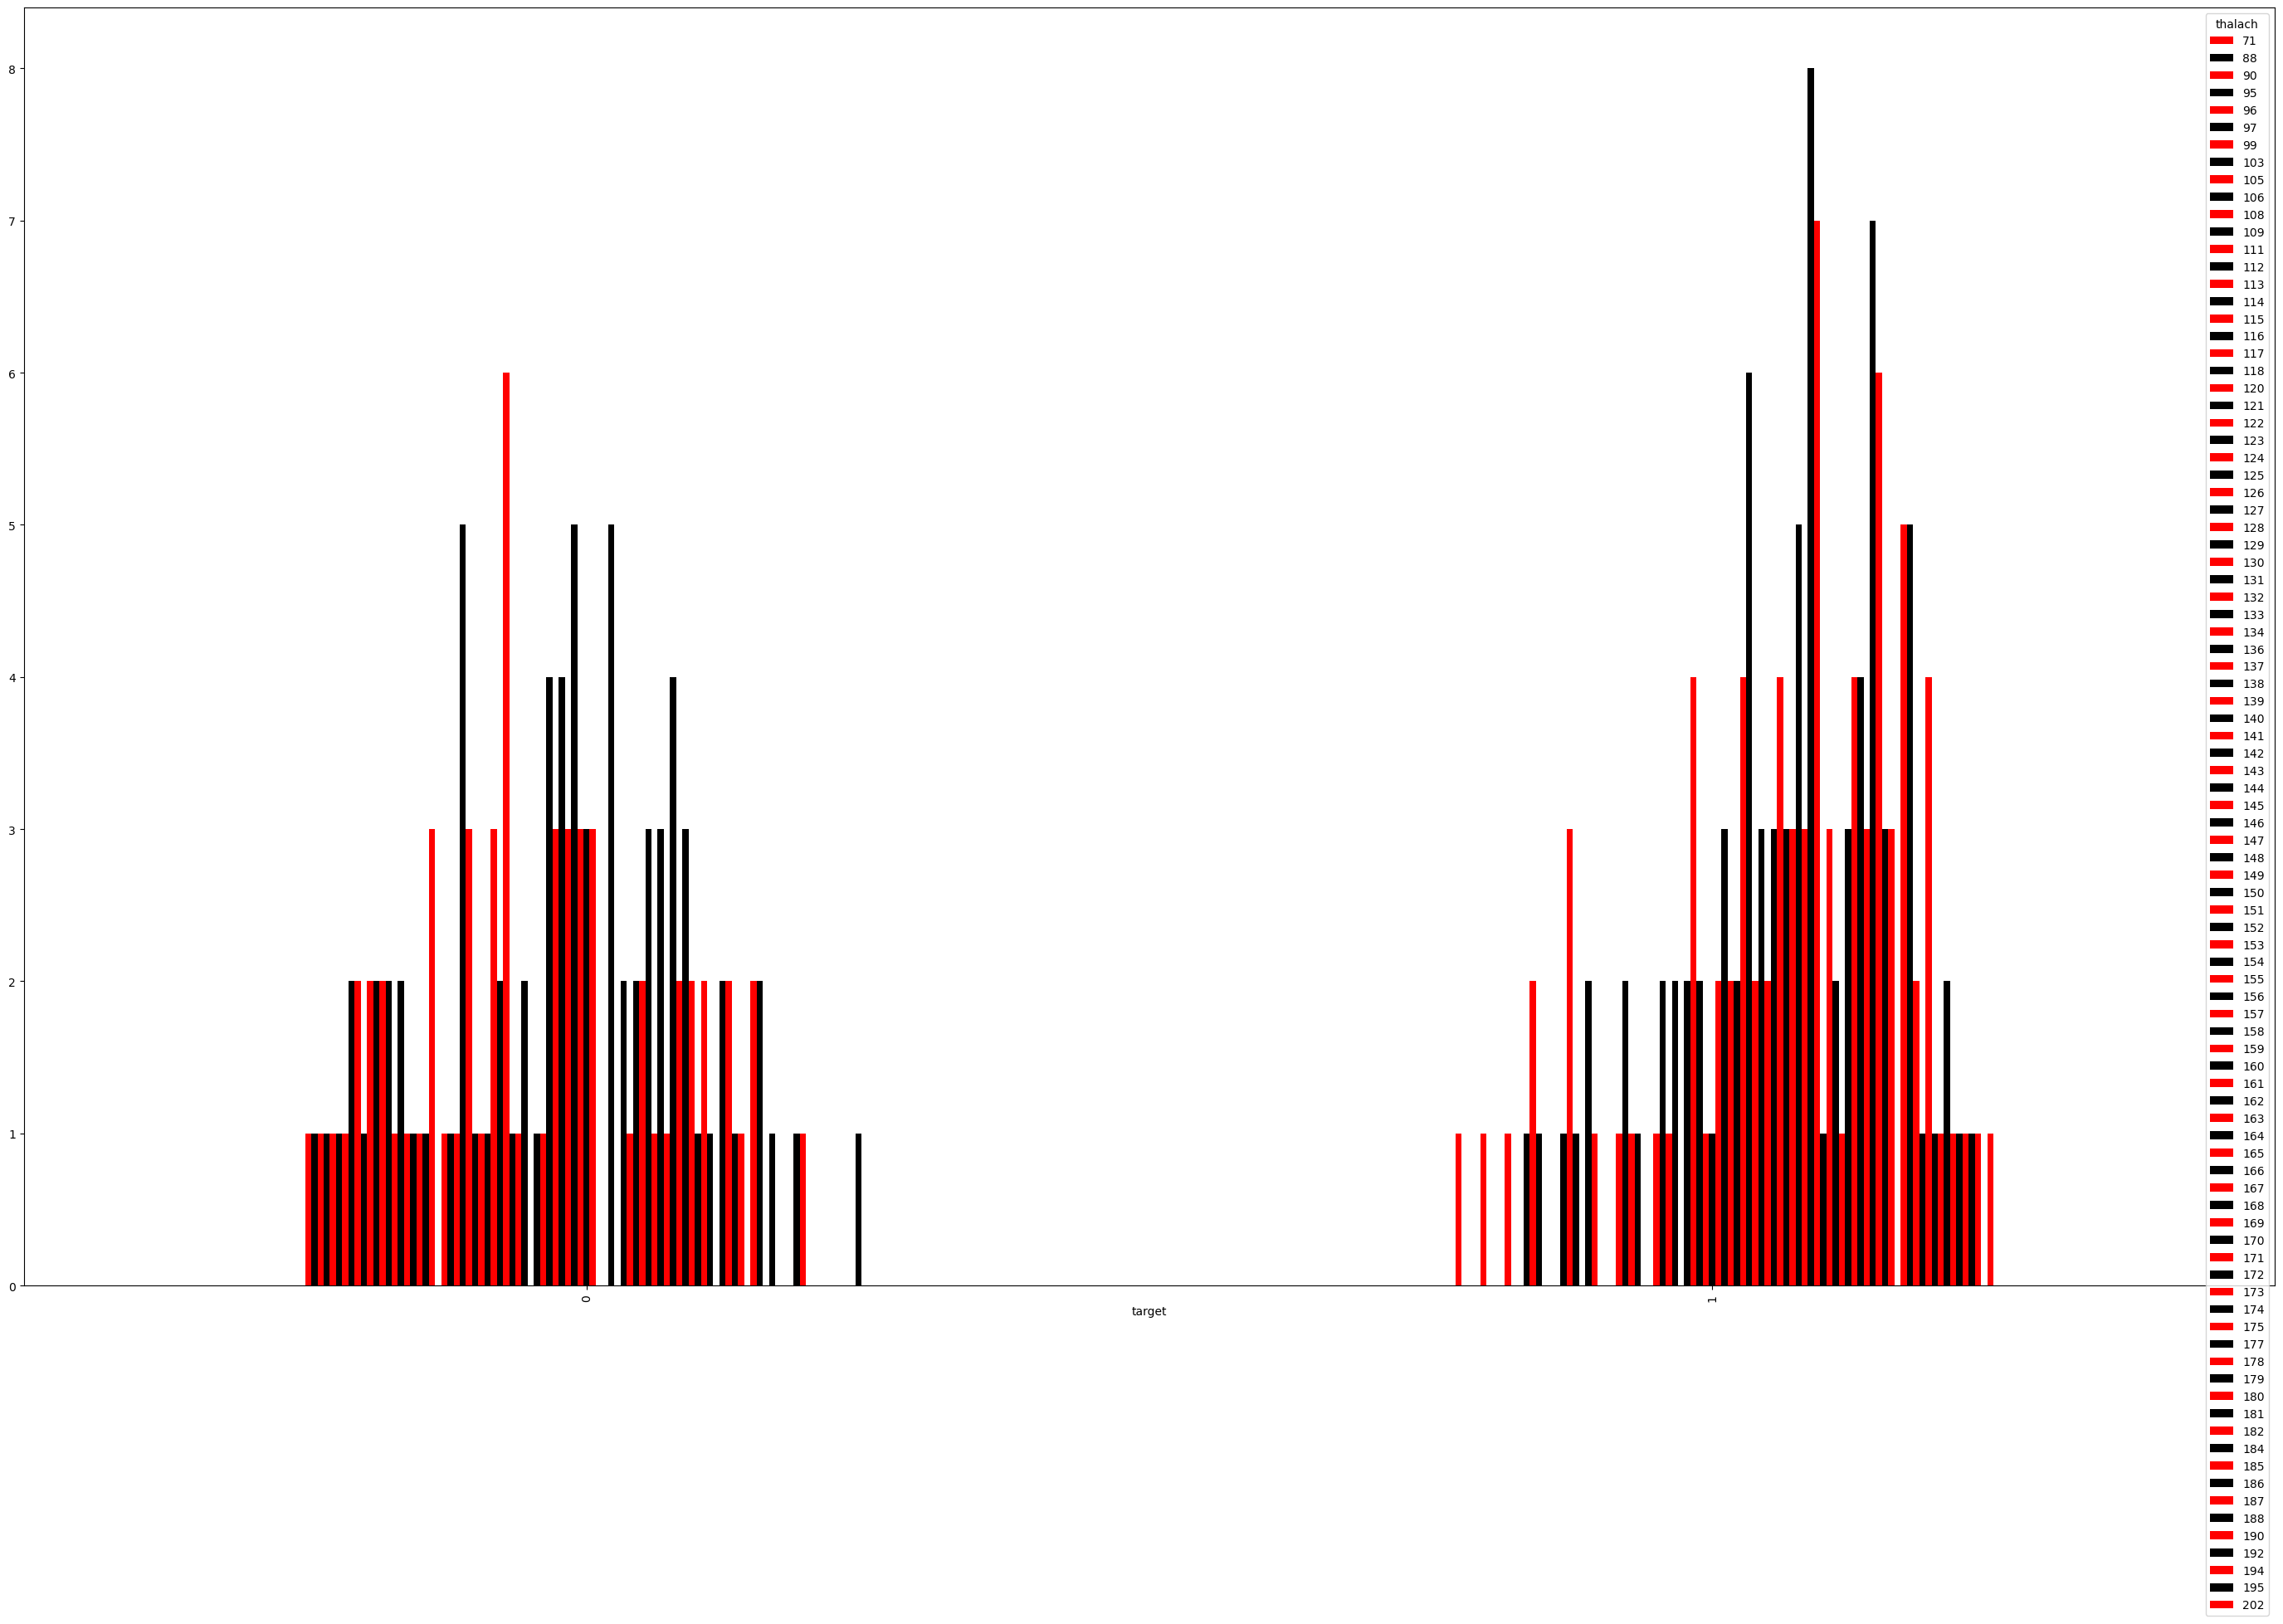

In [19]:
pd.crosstab(df.target,df.thalach).plot(kind="bar",
                                       figsize=(35,20),
                                       color=["Red","black"])

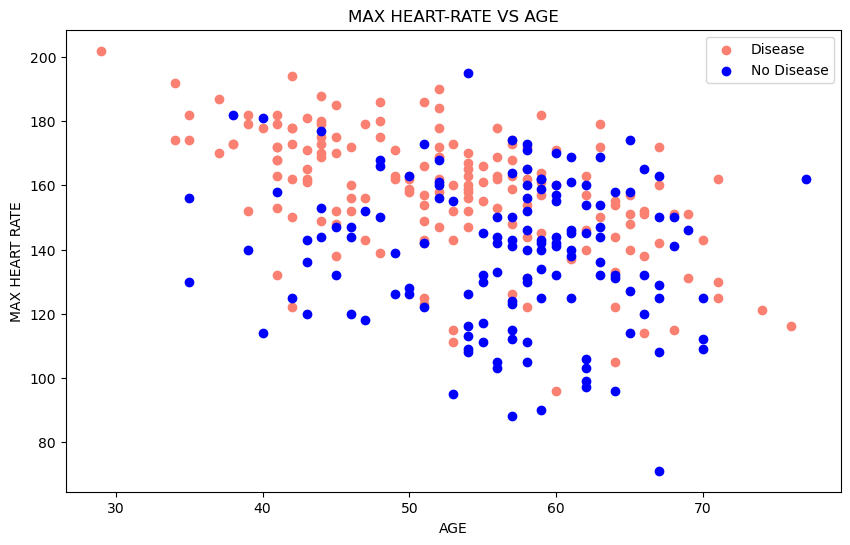

In [20]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color="salmon",
            )

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color="blue")

plt.title("MAX HEART-RATE VS AGE")
plt.xlabel("AGE")
plt.ylabel("MAX HEART RATE")
plt.legend(["Disease","No Disease"]);

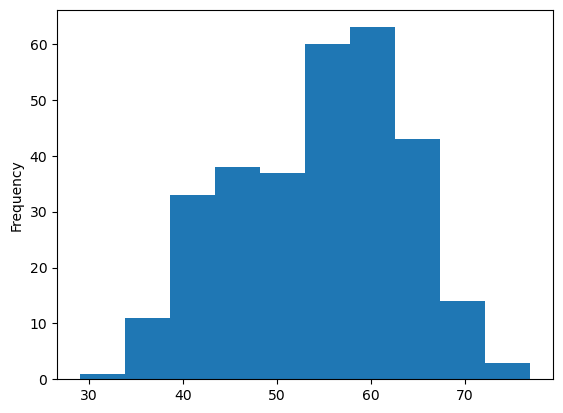

In [21]:
df.age.plot.hist();

In [22]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


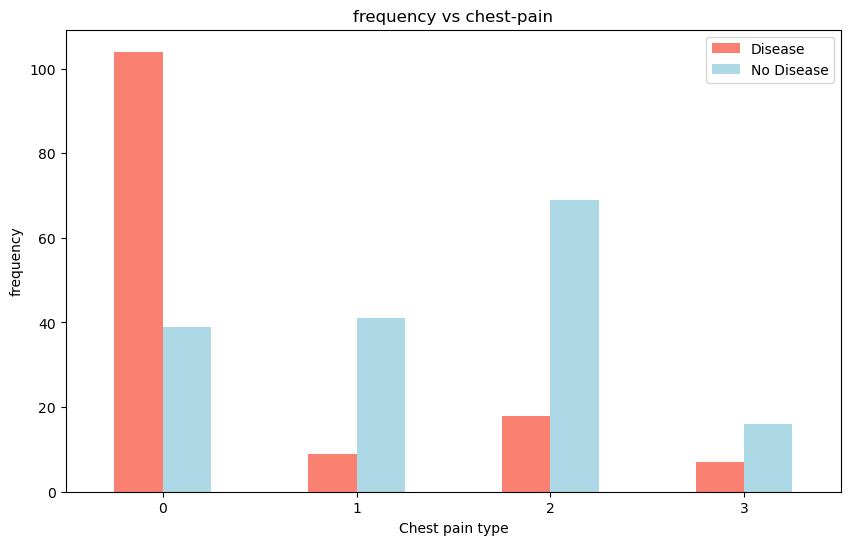

In [23]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])\

plt.title("frequency vs chest-pain")
plt.xlabel("Chest pain type")
plt.ylabel("frequency")
plt.legend(["Disease","No Disease"])
plt.xticks(rotation=0);

In [24]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

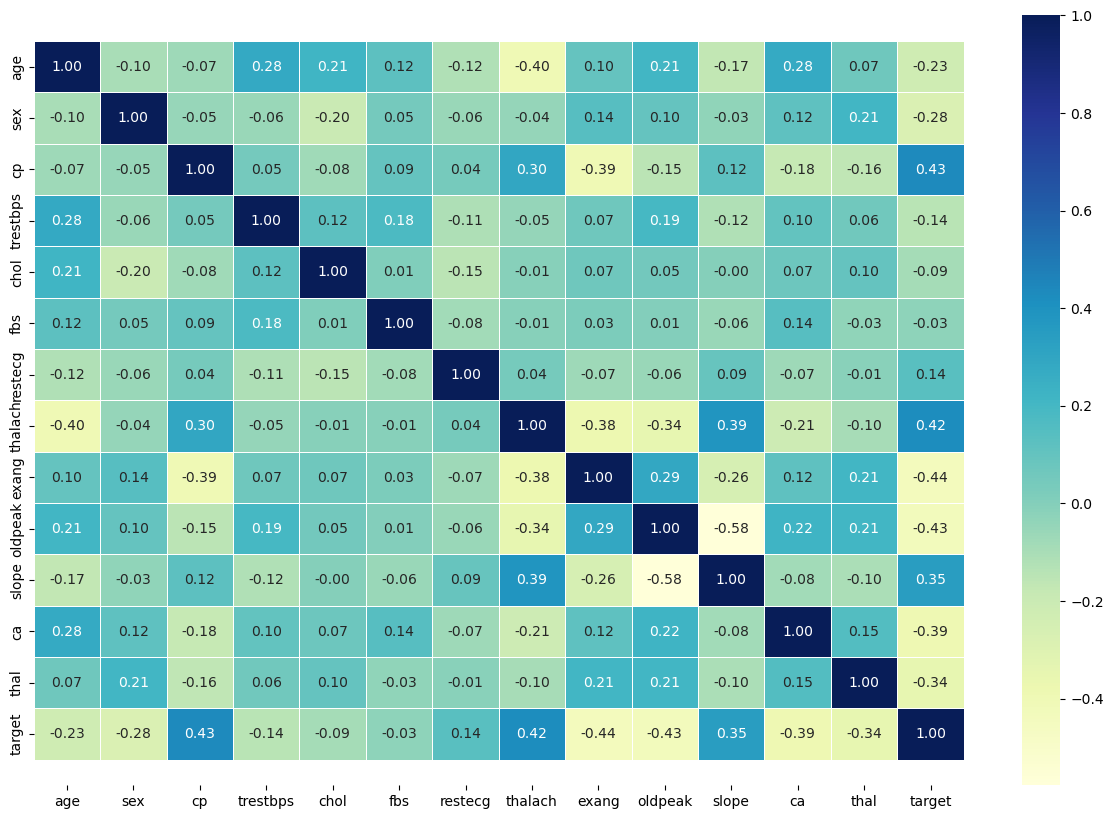

In [25]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlGnBu")

bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

In [27]:
x=df.drop("target",axis=1)
y=df["target"]

np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [34]:
models={"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()}

def fit_and_score(models,x_train,x_test,y_train,y_test):
    
    np.random.seed(42)
    model_scores={}
    
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
        
    return model_scores

In [35]:
model_scores= fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores

C:\Users\xxhar\OneDrive\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

(array([0, 1, 2]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest')])

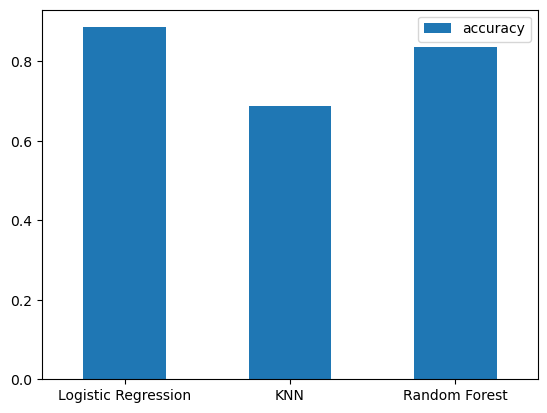

In [41]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare;
model_compare.T.plot.bar();
plt.xticks(rotation=0)

In [45]:
train_scores=[]
test_scores=[]

neighbors=range(1,21)

knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))


In [46]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [47]:
test_scores


[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum score with the given neighbors is 75.41%


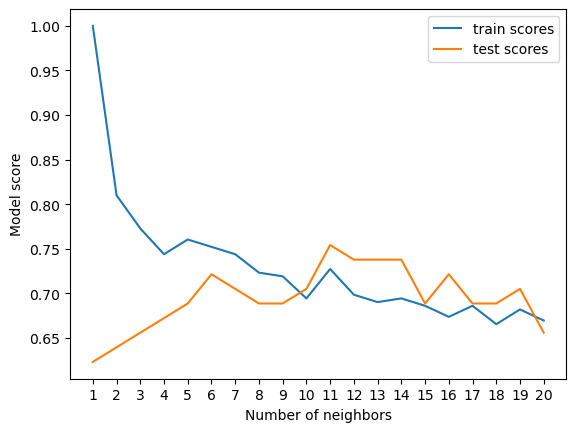

In [54]:
plt.plot(neighbors,train_scores,label="train scores")
plt.plot(neighbors,test_scores,label="test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum score with the given neighbors is {max(test_scores)*100:.2f}%")

In [62]:
#logistic regression tuning
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

In [58]:
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rs_log_reg.fit(x_train,y_train)




Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [59]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [60]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [63]:
np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)

rs_rf.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [64]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [65]:
rs_rf.score(x_test,y_test)

0.8688524590163934

In [129]:
log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}

gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=5)

gs_log_reg.fit(x_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ........C=0.0001, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/5] END ........C=0.0001, solver=liblinear;, score=0.633 total time=   0.0s
[CV 3/5] END ........C=0.0001, solver=liblinear;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.0001, solver=liblinear;, score=0.604 total time=   0.0s
[CV 5/5] END ........C=0.0001, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.00018873918221350977, solver=liblinear;, score=0.694 total time=   0.0s
[CV 2/5] END C=0.00018873918221350977, solver=liblinear;, score=0.673 total time=   0.0s
[CV 3/5] END C=0.00018873918221350977, solver=liblinear;, score=0.625 total time=   0.0s
[CV 4/5] END C=0.00018873918221350977, solver=liblinear;, score=0.625 total time=   0.0s
[CV 5/5] END C=0.00018873918221350977, solver=liblinear;, score=0.729 total time=   0.0s
[CV 1/5] END C=0.0003562247890262444, solver=liblinear;, score=0.735 total time=   0.0s


In [130]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [131]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [132]:
y_preds=gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

C:\Users\xxhar\OneDrive\Desktop\heart-disease-project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


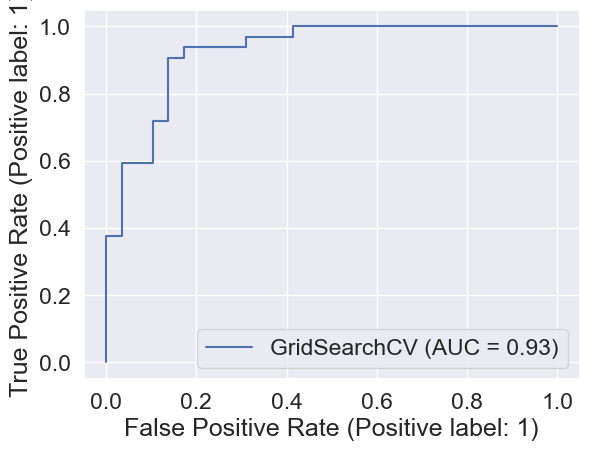

In [133]:
plot_roc_curve(gs_log_reg,x_test,y_test);

In [134]:
#confusion matrix

print(confusion_matrix(y_test,y_preds))


[[25  4]
 [ 3 29]]


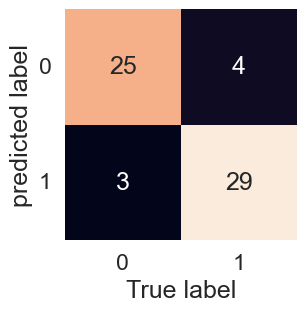

In [135]:
sns.set(font_scale=1.5)

def plot_conf_map(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("predicted label")
    bottom,top=ax.get_ylim()
    
    plt.yticks(rotation=0)
plot_conf_map(y_test,y_preds)
    

In [136]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [137]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [138]:
clf=LogisticRegression(C=0.20433597178569418,
                       solver="liblinear")

In [139]:
#cross-validated scores

cv_acc=cross_val_score(clf,
                       x, 
                       y,
                       cv=5,
                       scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [140]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [141]:
cv_precision=cross_val_score(clf,
                             x,
                             y, 
                             cv=5,
                             scoring="precision")


In [142]:
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [143]:
cv_recall=cross_val_score(clf,
                             x,
                             y, 
                             cv=5,
                             scoring="recall")

cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [144]:
cv_f1=cross_val_score(clf,
                             x,
                             y, 
                             cv=5,
                             scoring="f1")

cv_f1=np.mean(cv_f1)
cv_f1


0.8673007976269721

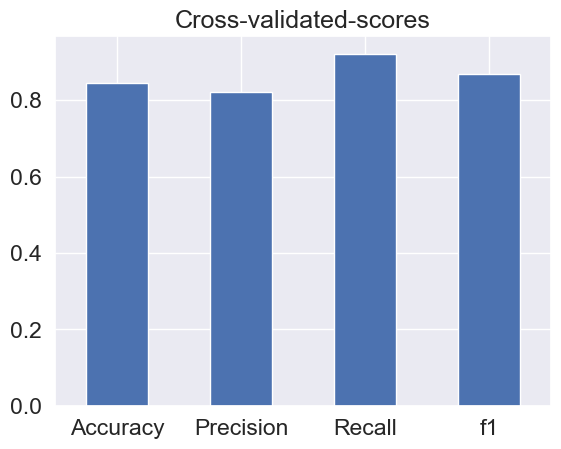

In [145]:
cv_metrics=pd.DataFrame({"Accuracy":np.mean(cv_acc),
                         "Precision":np.mean(cv_precision),
                         "Recall":np.mean(cv_recall),
                         "f1":np.mean(cv_f1)},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-validated-scores",
                      legend=False);
plt.xticks(rotation=0);


In [147]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [149]:
clf=LogisticRegression(C=0.20433597178569418,
                       solver='liblinear')

In [150]:
clf.fit(x_train,y_train)
clf.coef_

array([[ 0.00316728, -0.86044674,  0.66067031, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.56862789,
         0.45051632, -0.63609908, -0.67663375]])

In [152]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672830780218957,
 'sex': -0.8604467440762573,
 'cp': 0.6606703120090932,
 'trestbps': -0.011569932037408597,
 'chol': -0.00166374523064295,
 'fbs': 0.043861009724542044,
 'restecg': 0.3127586507840532,
 'thalach': 0.024593615555173243,
 'exang': -0.6041309439103262,
 'oldpeak': -0.5686278914396258,
 'slope': 0.4505163222528207,
 'ca': -0.6360990763634887,
 'thal': -0.6766337475895309}

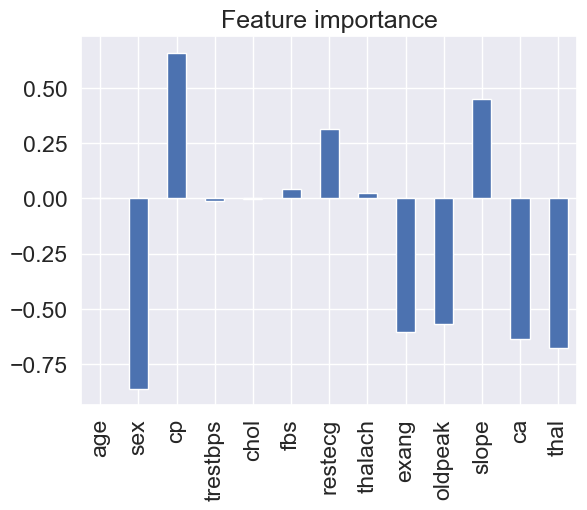

In [158]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature importance",legend=False);


In [159]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93
